### pandas 学习笔记

In [1]:
from pandas import Series,DataFrame
import pandas as pd

#### Series

Series 类似于一维数组（未指定索引，则从0开始，指定索引则类似字典数据）.Series 的值和索引都是numpy类型


In [5]:
num_series = Series([1,4,8])
hash_series = Series([1,4,56],['a','b','c'])
print(num_series)
print(hash_series)

0    1
1    4
2    8
dtype: int64
a     1
b     4
c    56
dtype: int64


In [6]:
num_series.index

RangeIndex(start=0, stop=3, step=1)

In [7]:
hash_series.index

Index(['a', 'b', 'c'], dtype='object')

In [18]:
## 使用列表创建series
num_seriest = Series(list([1,2,4,6]))
print("num_seriest:\n",num_seriest)

## 使用多个列表创建,索引和值得个数必须一致
num_series_muilt = Series(list([1,2,4,6]),index=["a","b","c","d"])
print("num_series_muilt\n",num_series_muilt)


num_seriest:
 0    1
1    2
2    4
3    6
dtype: int64
num_series_muilt
 a    1
b    2
c    4
d    6
dtype: int64


In [19]:
## 使用字典创建series
hash_seriest = Series({"a":1,"b":2,"c":0})
print("hash_seriest",hash_seriest)

## 使用字典和列表创建
hash_series_list = Series({"a":1,"b":2,"c":0},index=["a",'e',"c"])
print("hash_seriest\n",hash_seriest)
print("hash_series_list\n",hash_series_list)

hash_seriest a    1
b    2
c    0
dtype: int64
hash_seriest
 a    1
b    2
c    0
dtype: int64
hash_series_list
 a    1.0
e    NaN
c    0.0
dtype: float64


##### series 在算术运算中会自动对齐不同索引数据

In [23]:
## 执行过程，先把series对齐obj1 = {"a":1,"b":2,"c":3,"d":NaN,"f":Nan} obj1 = {"a":Nan,"b":5,"c":Nan,"d":6,"f":3}
obj1 = Series({"a":1,"b":2,"c":3})
obj2 = Series({"b":5,"d":6,"f":3})
obj1+obj2

a    NaN
b    7.0
c    NaN
d    NaN
f    NaN
dtype: float64

### 缺失值

pandas 使用NAN表示非数，缺失值

可以使用isnull,notnull 检查缺失值


In [22]:
print(hash_series_list.isnull())
print(pd.isnull(hash_series_list))

a    False
e     True
c    False
dtype: bool
a    False
e     True
c    False
dtype: bool


### DataFrame

DataFrame是表格数据，一组有序的列。每列可以是不同的数据类型

In [33]:
## 创建DataFrame

## 使用series组成的字典创建，DataFrame 会自动添加数字索引列
data = {"state":[3,2,5],"qq":["11111","22222","3333"]}
d = DataFrame(data)
## 如果指定列内容可顺序，则按指定,没有的使用缺失值填充
d2 = DataFrame(data,columns=["qq","state","t"])
d

,state,qq
0,3,11111
1,2,22222
2,5,3333


In [34]:
d2

,qq,state,t
0,11111,3,NaN
1,22222,2,NaN
2,3333,5,NaN


### pandas 基本功能

In [35]:
## 重新索引reindex,返回一个适应新索引的对象

obj = Series([1,2,3,4],index=['a','b','c','d'])


In [36]:
obj2 = obj.reindex(['d','c','a','b','g'])

In [37]:
print(obj)
print(obj2)

a    1
b    2
c    3
d    4
dtype: int64
d    4.0
c    3.0
a    1.0
b    2.0
g    NaN
dtype: float64


In [38]:
### 重新索引填充数据
obj3 = obj.reindex(['d','c','a','b','g'],fill_value=0)

In [39]:
print(obj3)

d    4
c    3
a    1
b    2
g    0
dtype: int64


In [42]:
## 时间序列可以进行插值填充
obj = Series([1,5,9,12,17],[0,4,7,9,11])
print(obj)
obj1 = obj.reindex(range(10),method="ffill")
print(obj1)

0      1
4      5
7      9
9     12
11    17
dtype: int64
0     1
1     1
2     1
3     1
4     5
5     5
6     5
7     9
8     9
9    12
dtype: int64


#### DataFrame 可以修改行，列的索引.如果仅传入一个序列，则重新索引行，使用columns可以重新索引列

In [43]:
d = DataFrame({"a":[1,4,5,6],"b":[0,9,6,4]})

In [48]:
print(d)
d.reindex([0,"a",2,1,3])

   a  b
0  1  0
1  4  9
2  5  6
3  6  4


,a,b
0,1.0,0.0
a,NaN,NaN
2,5.0,6.0
1,4.0,9.0
3,6.0,4.0


In [50]:
## 不存在的columns使用缺失填充
d.reindex(columns=["c","a"])

,c,a
0,NaN,1
1,NaN,4
2,NaN,5
3,NaN,6


#### 丢弃行，列

In [54]:
print(d)
## 丢弃行，直接drop行索引名
d.drop(1)

   a  b
0  1  0
1  4  9
2  5  6
3  6  4


,a,b
0,1,0
2,5,6
3,6,4


In [55]:
## 丢弃列，必须指定axis
d.drop("a",axis=1)

,b
0,0
1,9
2,6
3,4


### 合并

In [31]:
### merge 类似数据库的连表操作（inner join）。最好显示指出on的条件列，否则容易参数歧义
test = DataFrame({"key":['a','a','c','d'],"id":range(4),"name":["aa",'bb','bb','cc']})
test2 = DataFrame({"key":['e','d','a','f'],"id2":range(4),"id":range(4),"name":["cc",'ff','aa','cc']}) 


In [32]:
print(test)
print(test2)

  key  id name
0   a   0   aa
1   a   1   bb
2   c   2   bb
3   d   3   cc
  key  id2  id name
0   e    0   0   cc
1   d    1   1   ff
2   a    2   2   aa
3   f    3   3   cc


In [33]:
pd.merge(test,test2,on="key")## 如果不指出on条件，则系统选取一个列。（不知道会选哪个）


,key,id_x,name_x,id2,id_y,name_y
0,a,0,aa,2,2,aa
1,a,1,bb,2,2,aa
2,d,3,cc,1,1,ff


In [34]:
## 指定连接方式how='left' how='right',没有的数据用Nan填充
pd.merge(test,test2,on="key",how='left')

,key,id_x,name_x,id2,id_y,name_y
0,a,0,aa,2.0,2.0,aa
1,a,1,bb,2.0,2.0,aa
2,c,2,bb,NaN,NaN,NaN
3,d,3,cc,1.0,1.0,ff


In [ ]:
## 可以指定多个连接列条件


In [35]:
pd.merge(test,test2,on=["key","name"])

,key,id_x,name,id2,id_y
0,a,0,aa,2,2


### pandas 绘图

In [38]:
import numpy as np
%matplotlib inline
s = Series(np.random.rand(10).cumsum(),index=np.arange(0,100,10))

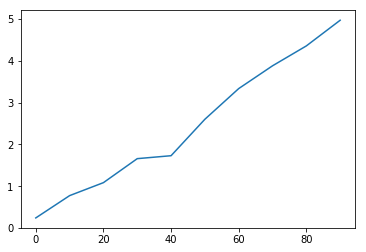

In [39]:

s.plot()

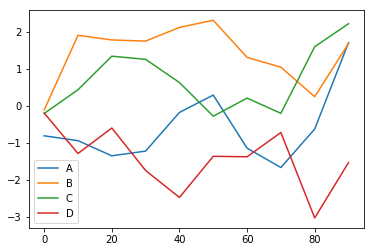

In [45]:
p = DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'],index=np.arange(0,100,10))
p.plot()

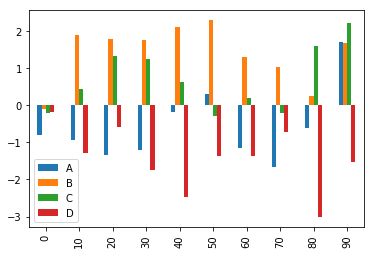

In [46]:
p.plot(kind='bar')

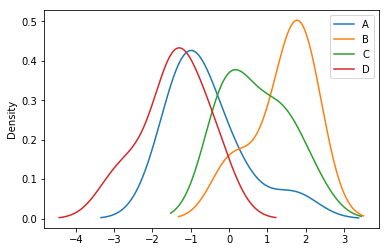

In [47]:
p.plot(kind='kde')

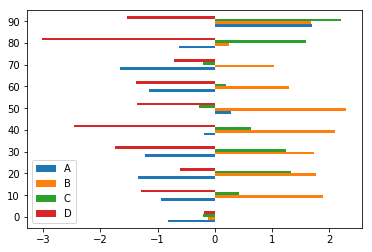

In [49]:
p.plot(kind="barh")